In [1]:
import pylab as plt
from matplotlib import rc
rc('text', usetex=True)
rc('font',**{'family':'sans-serif','sans-serif':['cmr']})
rc('font',**{'family':'serif','serif':['cmr']})

from numpy.random import multivariate_normal as mvn
%matplotlib inline

# Examples II

In [2]:
# Imports
import numpy as np
import swordfish as sf
 
# Basic grid
x = np.linspace(1, 10, 30)
dx = x[1]-x[0]

# Signal model
S = lambda a, b: b*np.sin(x+0.5*a+0.1*b)**2*dx

# Background components
B1 = 8./x*dx
B2 = 0.3*x*dx

# Background covariance matrix
X, Y = np.meshgrid(x,x)
K = (np.exp(-(X-Y)**2/20.)*0.02**2
    +np.exp(-(X-Y)**2*10.)*0.01**2)

# Exposure
E = np.ones_like(x)

# Instantiate Ronald
SF = sf.Swordfish([B1, B2], T=[0.1, 0.0], E=E, K=K)

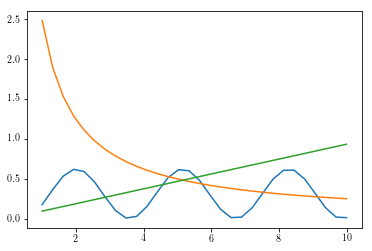

In [3]:
plt.plot(x, S(5, 2))
plt.plot(x, B1)
plt.plot(x, B2)

In [4]:
gradS, S0 = SF.linearize(S, (2, 6))
SF.covariance(gradS, S0 = S0)

array([[ 0.25578307, -0.49937424],
       [-0.49937424,  2.43562489]])

In [5]:
alist = np.linspace(0.1, 10, 40)
blist = np.linspace(0.1, 10, 40)
tf = SF.getfield(S, alist, blist)
vf1, vf2 = tf.VectorFields()

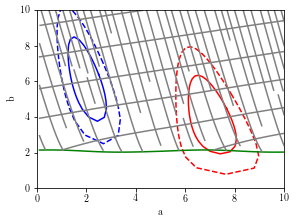

In [6]:
plt.figure(figsize=(4,3))

# Generate contours
tf.contour([7., 4.], 1.52, color='red');
tf.contour([7., 4.], 2.47, color='red', linestyle='--');
tf.contour([2., 6.], 1.52, color='blue');
tf.contour([2., 6.], 2.47, color='blue', linestyle='--');

# Generate upper limits
UL = [SF.upperlimit(S(a, 1.), 0.05) for a in alist]
plt.plot(alist, UL, color='green')

# Streamlines
mask = lambda a, b: np.interp(a, alist, UL)<b
vf1.streamlines(color='0.5', seed = 1, Nmax = 50, mask = mask);
vf2.streamlines(color='0.5', seed = 1, Nmax = 50, mask = mask);

# Rest
plt.xlim([0, 10])
plt.ylim([0, 10])
plt.xlabel("a")
plt.ylabel("b")
#plt.legend()
plt.tight_layout(pad=0.3)
plt.savefig("flow.eps")

In [12]:
Sd = S(2., 6)
dist = np.array([[SF.Delta(S(a, b), Sd) for a in alist] for b in blist])

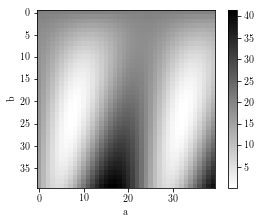

In [13]:
plt.figure(figsize=(4,3))
plt.imshow(dist, cmap='gray_r')
plt.colorbar()
plt.xlabel("a")
plt.ylabel("b")
plt.legend()
plt.tight_layout(pad=0.3)
# plt.savefig("/home/weniger/test.pdf")

In [14]:
M = SF.getMinuit(S, np.array([2.0+2*np.pi, 6.0]), print_level = 0)
M.migrad()
M.minos()
cont = M.contour("x0", "x1", bound = 3.)
lnL = np.array(cont[2])
lnL -= lnL.min()

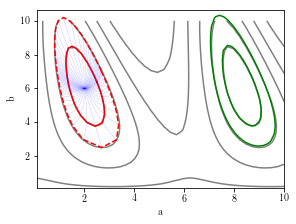

In [23]:
plt.figure(figsize=(4, 3))
plt.contour(alist, blist, dist, levels = [2.32, 6.12, 11.83, 19.31, 28.74], colors='0.5')
tf.contour([2., 6.], 1.52, plot_geodesics=False, color='red', linestyle='-');
tf.contour([2., 6.], 2.47, plot_geodesics=True, color='red', linestyle='--');
plt.contour(cont[0], cont[1], lnL, levels=[2.32, 6.12], colors='green')
plt.tight_layout(pad=0.3)
plt.xlabel("a")
plt.ylabel("b")
plt.tight_layout(pad=0.3)
plt.savefig("geodesics.eps")